In [1]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.utils import shuffle
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## Tvarkome Irisų duomenis

In [76]:
iris_data = fetch_ucirepo(id=53)

iris_X = iris_data.data.features
iris_y = iris_data.data.targets

# Sujungiame požymius ir tikslus į vieną duomenų rinkinį, pašaliname Setosa klasę ir paliekame tik Versicolor ir Virginica
iris = pd.concat([iris_X, iris_y], axis=1)
iris = iris[iris['class'].isin(['Iris-versicolor', 'Iris-virginica'])]

# Pakeičiame klasių pavadinimus ir pasidarome naują stulpelį klasėm, išreikštom per 0 ir 1
iris['class'] = iris['class'].replace(['Iris-versicolor', 'Iris-virginica'], [0, 1])

iris

,sepal length,sepal width,petal length,petal width,class
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


## Tvarkome krūties vėžio duomenis

In [2]:
bc_data = fetch_ucirepo(id=15)
bc_X = bc_data.data.features
bc_y = bc_data.data.targets

# Sujungiame duomenis
breast_cancer = pd.concat([bc_X, bc_y], axis=1)

# Pašaliname trūkstamų reikšmių eiles
print(breast_cancer.isna().sum())
breast_cancer = breast_cancer.dropna()

# Pakeičiame žymes
breast_cancer['Class'] = breast_cancer['Class'].replace([2, 4], [0, 1])

# Sukuriame failą su duomenimis
breast_cancer.to_csv('breast_cancer.csv', sep=',', index=False, header=True)
breast_cancer

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,0
695,2,1,1,1,2,1.0,1,1,1,0
696,5,10,10,3,7,3.0,8,10,2,1
697,4,8,6,4,3,4.0,10,6,1,1


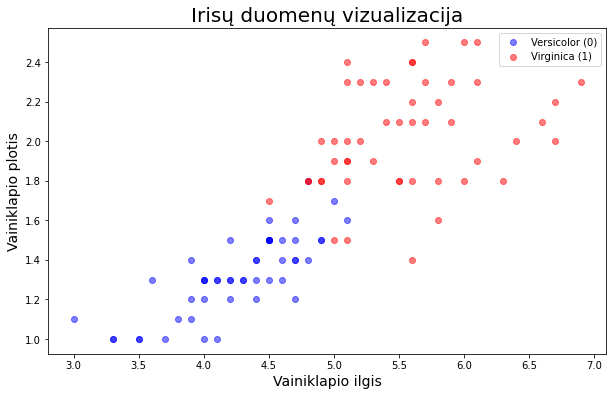

In [78]:
# Duomenų vizualizavimas: naudosime petal_length ir petal_width stulpelius
plt.figure(figsize=(10, 6))
plt.scatter(iris[iris['class'] == 0]['petal length'],
            iris[iris['class'] == 0]['petal width'], 
            color='blue', label='Versicolor (0)', alpha=0.5)

plt.scatter(iris[iris['class'] == 1]['petal length'],
            iris[iris['class'] == 1]['petal width'], 
            color='red', label='Virginica (1)', alpha=0.5)

plt.xlabel('Vainiklapio ilgis', fontsize=14)
plt.ylabel('Vainiklapio plotis', fontsize=14)
plt.title('Irisų duomenų vizualizacija', fontsize=20)
plt.legend()
plt.show()

In [79]:
"""import seaborn as sns
import matplotlib.pyplot as plt

# Pervadiname stulpelius
iris_graph = iris.rename(columns={
    'sepal length': 'Taurėlapio ilgis', 
    'sepal width': 'Taurėlapio plotis', 
    'petal length': 'Vainiklapio ilgis', 
    'petal width': 'Vainiklapio plotis',
    'class': 'Klasė'
})

palette_colors = {0: "red", 1: "blue"}

g = sns.pairplot(iris_graph, hue='Klasė', diag_kind="kde", corner=False, palette=palette_colors)

for ax in g.axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=12)  
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)  
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)  

plt.show()"""

'import seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Pervadiname stulpelius\niris_graph = iris.rename(columns={\n    \'sepal length\': \'Taurėlapio ilgis\', \n    \'sepal width\': \'Taurėlapio plotis\', \n    \'petal length\': \'Vainiklapio ilgis\', \n    \'petal width\': \'Vainiklapio plotis\',\n    \'class\': \'Klasė\'\n})\n\npalette_colors = {0: "red", 1: "blue"}\n\ng = sns.pairplot(iris_graph, hue=\'Klasė\', diag_kind="kde", corner=False, palette=palette_colors)\n\nfor ax in g.axes.flatten():\n    ax.tick_params(axis=\'both\', which=\'major\', labelsize=12)  \n    ax.set_xlabel(ax.get_xlabel(), fontsize=14)  \n    ax.set_ylabel(ax.get_ylabel(), fontsize=14)  \n\nplt.show()'

## Didiname duomenų kiekį

In [80]:
# Atsiskiriame požymius ir tikslus
X = iris.iloc[:, :4]
y = iris.iloc[:, -1]

mod_iris = pd.DataFrame(X)
mod_label = pd.DataFrame(y)

# 4 kartus generuojame modifikuotus (su pridėtu triukšmu) požymius
for _ in range (4):
    mod = np.random.normal(0, 0.08, [100, 4]) 
    mod_noise = X.iloc[:, :4] + mod
    mod_iris = pd.concat([mod_iris, mod_noise], axis=0)

# Tas pačias klases perrašom 4 kartus  
mod_label = pd.concat([mod_label] * 5)

# Sudedam padidintus duomenis
iris_new = pd.concat([mod_iris.reset_index(drop=True), mod_label.reset_index(drop=True)], axis=1)

iris_new.to_csv('iris.csv', sep=',', index=False, header=True)
iris_new

,sepal length,sepal width,petal length,petal width,class
0,7.000000,3.200000,4.700000,1.400000,0
1,6.400000,3.200000,4.500000,1.500000,0
2,6.900000,3.100000,4.900000,1.500000,0
3,5.500000,2.300000,4.000000,1.300000,0
4,6.500000,2.800000,4.600000,1.500000,0
...,...,...,...,...,...
495,6.861593,2.939899,5.085175,2.230916,1
496,6.317611,2.465517,4.998518,2.014921,1
497,6.435380,3.022994,5.140463,2.133954,1
498,6.211908,3.370359,5.409210,2.292950,1


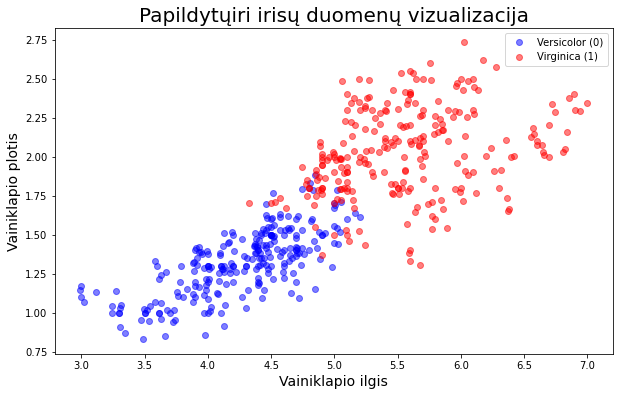

In [81]:
# Duomenų vizualizavimas: naudosime petal_length ir petal_width stulpelius
plt.figure(figsize=(10, 6))
plt.scatter(iris_new[iris_new['class'] == 0]['petal length'],
            iris_new[iris_new['class'] == 0]['petal width'], 
            color='blue', label='Versicolor (0)', alpha=0.5)

plt.scatter(iris_new[iris_new['class'] == 1]['petal length'],
            iris_new[iris_new['class'] == 1]['petal width'],  
            color='red', label='Virginica (1)', alpha=0.5)

plt.xlabel('Vainiklapio ilgis', fontsize=14)
plt.ylabel('Vainiklapio plotis', fontsize=14)
plt.title('Papildytųiri irisų duomenų vizualizacija', fontsize=20)
plt.legend()
plt.show()

In [82]:
"""import seaborn as sns
import matplotlib.pyplot as plt

# Pervadiname stulpelius
iris_graph = iris_new.rename(columns={
    'sepal length': 'Taurėlapio ilgis', 
    'sepal width': 'Taurėlapio plotis', 
    'petal length': 'Vainiklapio ilgis', 
    'petal width': 'Vainiklapio plotis',
    'class': 'Klasė'
})

palette_colors = {0: "red", 1: "blue"}

g = sns.pairplot(iris_graph, hue='Klasė', diag_kind="kde", corner=False, palette=palette_colors)

for ax in g.axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=12)  
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)  
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)  

plt.show()"""

'import seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Pervadiname stulpelius\niris_graph = iris_new.rename(columns={\n    \'sepal length\': \'Taurėlapio ilgis\', \n    \'sepal width\': \'Taurėlapio plotis\', \n    \'petal length\': \'Vainiklapio ilgis\', \n    \'petal width\': \'Vainiklapio plotis\',\n    \'class\': \'Klasė\'\n})\n\npalette_colors = {0: "red", 1: "blue"}\n\ng = sns.pairplot(iris_graph, hue=\'Klasė\', diag_kind="kde", corner=False, palette=palette_colors)\n\nfor ax in g.axes.flatten():\n    ax.tick_params(axis=\'both\', which=\'major\', labelsize=12)  \n    ax.set_xlabel(ax.get_xlabel(), fontsize=14)  \n    ax.set_ylabel(ax.get_ylabel(), fontsize=14)  \n\nplt.show()'

## Perceptronas ir jo mokymas

In [83]:
# Funkcija duomenų nuskaitymui ir paruošimui

def nuskaityti_duomenis(failas):
    # Nuskaitome duomenų rinkinį iš failo ir sumaišome
    data = pd.read_csv(failas).sample(frac=1).reset_index(drop=True)
    
    # Atskiriame požymius (X) ir žymes (t)
    X = data.iloc[:, :-1]
    t = data.iloc[:, -1]
    
    # Pridedame poslinkio (bias) stulpelį
    
    bias = pd.DataFrame(np.ones(X.shape[0]), columns=['Bias'])
    X.reset_index(drop=True, inplace=True)
    bias.reset_index(drop=True, inplace=True)
    t.reset_index(drop=True, inplace=True)

    # Sujungiame požymius su poslinkio stulpeliu
    X = pd.concat([bias, X], axis=1)
    
    return X, t

    
# Sigmoidinės funkcijos apibrėžimas
def sigmoidine(z):
    return 1 / (1 + np.exp(-z))

# Funkcija klasifikavimui
def klasifikavimas(f):
    return 1 if f >= 0.5 else 0

# Funkcija svoriams atnaujinti
def svorio_atnaujinimas(w, alpha, xi, ti, f):
    return w - alpha * (f - ti) * f * (1 - f) * xi

# Funkcija klaidai skaičiuoti
def skaiciuoti_klaida(predicted, ti):
    return (predicted - ti) ** 2


In [84]:
def mokymas(failas, alpha, epochos, min_error, test_size):
    X, t = nuskaityti_duomenis(failas)
    
    # Padalijame duomenis į mokymo ir testavimo aibes
    X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=test_size, random_state=42)
    
    # Inicijuojame svorius
    w = np.random.uniform(-1, 1, X_train.shape[1])
    
    epocha = 0
    mok_klaidos = []
    mok_tikslumai = []
    test_klaidos = []
    test_tikslumai = []
    
    while epocha < epochos:
        mok_klaida = 0
        klasifikacijos_mok = []
        
        # Atsitiktinai sumaišome duomenis
        data_shuffled = pd.concat([X_train, t_train], axis=1).sample(frac=1).reset_index(drop=True)
        
        # Atliekame mokymą naudojant SGD
        for i in range(X_train.shape[0]):
            xi = data_shuffled.iloc[i, :-1].values
            ti = data_shuffled.iloc[i, -1]
            
            # Skaičiuojame sandaugą ir pritaikome sigmoidinę aktyvacijos funkciją
            z = np.dot(xi, w.T)
            f = sigmoidine(z)
            
            # Klasifikuojame
            predicted = klasifikavimas(f)
            klasifikacijos_mok.append(predicted)
            
            # Atnaujiname svorius
            w = svorio_atnaujinimas(w, alpha, xi, ti, f)
            
            # Skaičiuojame kvadratinę klaidą
            mok_klaida += skaiciuoti_klaida(f, ti)
        
        epocha += 1
        
        # Skaičiuojame ir išsaugome mokymo klasifikavimo tikslumą
        mok_accuracy = accuracy_score(data_shuffled.iloc[:, -1], klasifikacijos_mok)
        mok_tikslumai.append(mok_accuracy)
        mok_klaidos.append(mok_klaida / X_train.shape[0])
        
        # Baigiame mokymą, jei klaida tampa mažesnė už nustatytą ribą
        if 1 - mok_accuracy <= min_error:
            break

    # Testavimo fazė vykdoma po visų epochų arba pasiekus minimalią klaidą
    klasifikacijos_test = []
    test_klaida = 0
    results = []  

    for i in range(X_test.shape[0]):
        xi_test = X_test.iloc[i, :].values
        
        # Skaičiuojame sandaugą ir pritaikome sigmoidinę aktyvacijos funkciją
        z_test = np.dot(xi_test, w.T)
        f_test = sigmoidine(z_test)
        
        # Klasifikuojame
        predicted_test = klasifikavimas(f_test)
        klasifikacijos_test.append(predicted_test)
        
        # Išsaugome priskirtas ir tikrąsias klases
        results.append((predicted_test, t_test.iloc[i])) 
        
        # Skaičiuojame kvadratinę klaidą
        test_klaida += skaiciuoti_klaida(t_test.iloc[i], f_test)
    
    test_accuracy = accuracy_score(t_test, klasifikacijos_test)
    test_tikslumai.append(test_accuracy)
    test_klaidos.append(test_klaida / X_test.shape[0])
    
    # Grąžinti svorius, klaidų ir tikslumo rezultatus
    return w, mok_klaidos, mok_tikslumai, test_klaidos, test_tikslumai, results


In [85]:
# Funkcija grafiko piešimui
def grafikai(klaida, tikslumas):
    epochos_range = range(1, len(klaida) + 1)
    
    plt.figure(figsize=(14, 6))
    
    # Klaidos grafikas
    plt.subplot(1, 2, 1)
    plt.plot(epochos_range, klaida, label="Paklaida kiekvienoje epochoje", color='red')
    plt.xlabel("Epocha")
    plt.ylabel("Paklaida")
    plt.legend()
    
    # Tikslumo grafikas
    plt.subplot(1, 2, 2)
    plt.plot(epochos_range, tikslumas, label="Tikslumas kiekvienoje epochoje", color='green')
    plt.xlabel("Epocha")
    plt.ylabel("Tikslumas")
    plt.legend()
    
    plt.show()

## Mokymas ir testavimas su duomenų rinkiniais

In [86]:
# Paleidžiame mokymą ir testavimą su Irisų duomenimis

file = 'iris.csv'

#Hiperparametrai
alphos = [0.1, 0.5, 0.99]
epochos = [10, 100, 1000]
min_error = 0.01
test_size = 0.2

w_irisu_alpha = []
mok_klaidos_alpha = []
mok_tikslumai_alpha = []
test_klaidos_alpha = []
test_tikslumai_alpha = []
test_results = []

for alpha in alphos:
    for epocha in epochos:
        w_irisu, mok_klaidos, mok_tikslumai, test_klaidos, test_tikslumai, test_result = mokymas(file, alpha, epocha, min_error, test_size)
    
        w_irisu_alpha.append(w_irisu)
        mok_klaidos_alpha.append(mok_klaidos)
        mok_tikslumai_alpha.append(mok_tikslumai)
        test_klaidos_alpha.append(test_klaidos)
        test_tikslumai_alpha.append(test_tikslumai)    
        test_results.append(test_result)

"# Paleidžiame mokymą ir testavimą su Irisų duomenimis\n\nfile = 'iris.csv'\n\n#Hiperparametrai\nalphos = [0.1, 0.5, 0.99]\nepochos = [10, 100, 1000]\nmin_error = 0.01\ntest_size = 0.2\n\nw_irisu_alpha = []\nmok_klaidos_alpha = []\nmok_tikslumai_alpha = []\ntest_klaidos_alpha = []\ntest_tikslumai_alpha = []\ntest_results = []\n\nfor alpha in alphos:\n    for epocha in epochos:\n        w_irisu, mok_klaidos, mok_tikslumai, test_klaidos, test_tikslumai, test_result = mokymas(file, alpha, epocha, min_error, test_size)\n    \n        w_irisu_alpha.append(w_irisu)\n        mok_klaidos_alpha.append(mok_klaidos)\n        mok_tikslumai_alpha.append(mok_tikslumai)\n        test_klaidos_alpha.append(test_klaidos)\n        test_tikslumai_alpha.append(test_tikslumai)    \n        test_results.append(test_result)"

In [87]:
# Sukuriame lentelę su irisų duomenimis 
   
data_iris = [
    [10, 0.1, mok_tikslumai_alpha[0][9], test_tikslumai_alpha[0], mok_klaidos_alpha[0][9], test_klaidos_alpha[0]],
    [10, 0.5, mok_tikslumai_alpha[3][9], test_tikslumai_alpha[3], mok_klaidos_alpha[3][9], test_klaidos_alpha[3]],
    [10, 0.99, mok_tikslumai_alpha[6][9], test_tikslumai_alpha[6], mok_klaidos_alpha[6][9], test_klaidos_alpha[6]],


    
    [100, 0.1, mok_tikslumai_alpha[1][99], test_tikslumai_alpha[1], mok_klaidos_alpha[1][99], test_klaidos_alpha[1]],
    [100, 0.5, mok_tikslumai_alpha[4][99], test_tikslumai_alpha[4], mok_klaidos_alpha[4][99], test_klaidos_alpha[4]],
    [100, 0.99, mok_tikslumai_alpha[7][99], test_tikslumai_alpha[7], mok_klaidos_alpha[7][99], test_klaidos_alpha[7]],

    
    [1000, 0.1, mok_tikslumai_alpha[2][999], test_tikslumai_alpha[2], mok_klaidos_alpha[2][999], test_klaidos_alpha[2]],
    [1000, 0.5, mok_tikslumai_alpha[5][999], test_tikslumai_alpha[5], mok_klaidos_alpha[5][999], test_klaidos_alpha[5]],
    [1000, 0.99, mok_tikslumai_alpha[8][999], test_tikslumai_alpha[8], mok_klaidos_alpha[8][999], test_klaidos_alpha[8]]

]

df_iris = pd.DataFrame(data_iris, columns=["Epochos", "Mokymo greitis (alpha)", "Mokymo tikslumas", "Testavimo tikslumas", "Mokymo paklaida", "Testavimo paklaida"])
print(df_iris)


'# Sukuriame lentelę su irisų duomenimis \n   \ndata_iris = [\n    [10, 0.1, mok_tikslumai_alpha[0][9], test_tikslumai_alpha[0], mok_klaidos_alpha[0][9], test_klaidos_alpha[0]],\n    [10, 0.5, mok_tikslumai_alpha[3][9], test_tikslumai_alpha[3], mok_klaidos_alpha[3][9], test_klaidos_alpha[3]],\n    [10, 0.99, mok_tikslumai_alpha[6][9], test_tikslumai_alpha[6], mok_klaidos_alpha[6][9], test_klaidos_alpha[6]],\n\n\n    \n    [100, 0.1, mok_tikslumai_alpha[1][99], test_tikslumai_alpha[1], mok_klaidos_alpha[1][99], test_klaidos_alpha[1]],\n    [100, 0.5, mok_tikslumai_alpha[4][99], test_tikslumai_alpha[4], mok_klaidos_alpha[4][99], test_klaidos_alpha[4]],\n    [100, 0.99, mok_tikslumai_alpha[7][99], test_tikslumai_alpha[7], mok_klaidos_alpha[7][99], test_klaidos_alpha[7]],\n\n    \n    [1000, 0.1, mok_tikslumai_alpha[2][999], test_tikslumai_alpha[2], mok_klaidos_alpha[2][999], test_klaidos_alpha[2]],\n    [1000, 0.5, mok_tikslumai_alpha[5][999], test_tikslumai_alpha[5], mok_klaidos_alpha[5]

In [88]:
grafikai(mok_klaidos_alpha[5], mok_tikslumai_alpha[5])

In [100]:
from collections import Counter

# Sukuriame dažnių lentelę
dazniai = Counter(test_results[5])

for elementas, daznis in dazniai.items():
    print(f"Elementas {elementas} pasitaiko {daznis} kartus.")

IndexError: list index out of range

## Vėžys

In [90]:
# Paleidžiame mokymą ir testavimą su krutų vėžio duomenimis

file = 'breast_cancer.csv'

#Hiperparametrai
alphos = [0.1, 0.5, 0.99]
epochos = [10, 100, 1000]
min_error = 0.01
test_size = 0.2

w_cancer_alpha = []
c_mok_klaidos_alpha = []
c_mok_tikslumai_alpha = []
c_test_klaidos_alpha = []
c_test_tikslumai_alpha = []
c_test_results = []

for alpha in alphos:
    for epocha in epochos:
        w_cancer, mok_klaidos, mok_tikslumai, test_klaidos, test_tikslumai, c_test_result = mokymas(file, alpha, epocha, min_error, test_size)
    
        w_cancer_alpha.append(w_cancer)
        c_mok_klaidos_alpha.append(mok_klaidos)
        c_mok_tikslumai_alpha.append(mok_tikslumai)
        c_test_klaidos_alpha.append(test_klaidos)
        c_test_tikslumai_alpha.append(test_tikslumai)   
        c_test_results.append(c_test_result)

In [91]:
# Sukuriame lentelę su vėžio duomenimis 

data_cancer = [
    [10, 0.1, c_mok_tikslumai_alpha[0][9], c_test_tikslumai_alpha[0], c_mok_klaidos_alpha[0][9], c_test_klaidos_alpha[0]],
    [10, 0.5, c_mok_tikslumai_alpha[3][9], c_test_tikslumai_alpha[3], c_mok_klaidos_alpha[3][9], c_test_klaidos_alpha[3]],
    [10, 0.99, c_mok_tikslumai_alpha[6][9], c_test_tikslumai_alpha[6], c_mok_klaidos_alpha[6][9], c_test_klaidos_alpha[6]],

    [100, 0.1, c_mok_tikslumai_alpha[1][99], c_test_tikslumai_alpha[1], c_mok_klaidos_alpha[1][99], c_test_klaidos_alpha[1]],
    [100, 0.5, c_mok_tikslumai_alpha[4][99], c_test_tikslumai_alpha[4], c_mok_klaidos_alpha[4][99], c_test_klaidos_alpha[4]],
    [100, 0.99, c_mok_tikslumai_alpha[7][99], c_test_tikslumai_alpha[7], c_mok_klaidos_alpha[7][99], c_test_klaidos_alpha[7]],

    [1000, 0.1, c_mok_tikslumai_alpha[2][999], c_test_tikslumai_alpha[2], c_mok_klaidos_alpha[2][999], c_test_klaidos_alpha[2]],
    [1000, 0.5, c_mok_tikslumai_alpha[5][999], c_test_tikslumai_alpha[5], c_mok_klaidos_alpha[5][999], c_test_klaidos_alpha[5]],
    [1000, 0.99, c_mok_tikslumai_alpha[8][999], c_test_tikslumai_alpha[8], c_mok_klaidos_alpha[8][999], c_test_klaidos_alpha[8]]
]

df_cancer = pd.DataFrame(data_cancer, columns=["Epochos", "Mokymo greitis (alpha)", "Mokymo tikslumas", "Testavimo tikslumas", "Mokymo paklaida", "Testavimo paklaida"])

print(df_cancer)

   Epochos  Mokymo greitis (alpha)  Mokymo tikslumas   Testavimo tikslumas  \
0       10                    0.10          0.646520  [0.6642335766423357]   
1       10                    0.50          0.670330  [0.5693430656934306]   
2       10                    0.99          0.670330  [0.5693430656934306]   
3      100                    0.10          0.968864  [0.9781021897810219]   
4      100                    0.50          0.653846   [0.635036496350365]   
5      100                    0.99          0.639194  [0.6934306569343066]   
6     1000                    0.10          0.974359  [0.9854014598540146]   
7     1000                    0.50          0.650183  [0.6496350364963503]   
8     1000                    0.99          0.635531   [0.708029197080292]   

   Mokymo paklaida      Testavimo paklaida  
0         0.353513     [0.335785448572004]  
1         0.329675   [0.43066929873602067]  
2         0.329675    [0.4306635479868758]  
3         0.024368  [0.0258734056356861

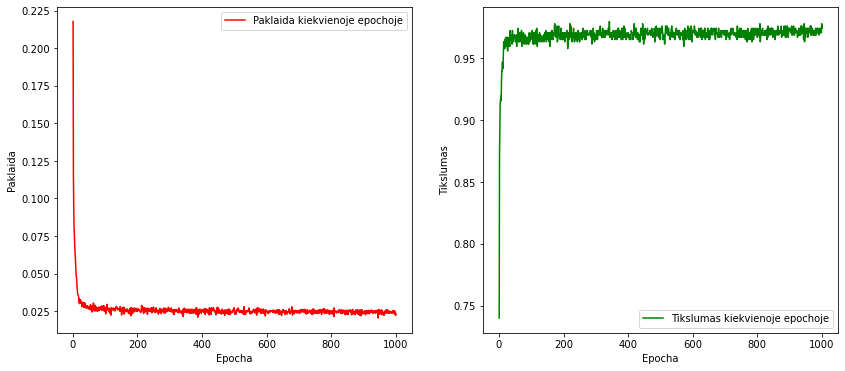

In [102]:
grafikai(c_mok_klaidos_alpha[2], c_mok_tikslumai_alpha[2])

In [103]:
dazniai = Counter(c_test_results[2])

for elementas, daznis in dazniai.items():
    print(f"Elementas {elementas} pasitaiko {daznis} kartus.")

Elementas (0, 0) pasitaiko 91 kartus.
Elementas (1, 1) pasitaiko 44 kartus.
Elementas (1, 0) pasitaiko 1 kartus.
Elementas (0, 1) pasitaiko 1 kartus.


## Klasifikuojame duomenis su gautais svoriais

In [105]:
# Gauti svoriai

print(f'Krūtų vėžio duomenis apmokyto perceptrono svoriai {w_cancer_alpha[2]}')


Krūtų vėžio duomenis apmokyto perceptrono svoriai [-15.87839109   0.67774555   0.53026084   0.93977913   0.38368681
  -0.40528916   0.84811627   0.7207452    0.43610921   1.00150059]


In [106]:
def tikrinimas(file, w):
    X, y = nuskaityti_duomenis(file)
    teisingi = 0
    for i in range(X.shape[0]):
        z = np.dot(X.iloc[i, :].values, w.T)
        f = sigmoidine(z)
        predicted = klasifikavimas(f)
        if predicted == y[i]:
            teisingi += 1
    accuracy = teisingi/X.shape[0]*100
    return teisingi, accuracy

In [114]:
#irisu_teisingi, irisu_accuracy = tikrinimas('iris.csv', iris_alpha[5])
cancer_teisingi, cancer_accuracy = tikrinimas('breast_cancer.csv', w_cancer_alpha[2])

print(f"Irisų duomenų rinkinio tikslumas: {irisu_accuracy:.2f}%")
print(f"Krūties vėžio duomenų rinkinio tikslumas: {cancer_accuracy:.2f}%")

Irisų duomenų rinkinio tikslumas: 97.00%
Krūties vėžio duomenų rinkinio tikslumas: 97.95%
